In [21]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import lag_plot

In [2]:
%run ../src/models/section_series.py
series_loader = SectionSeriesLoader(
    img_shape=(200, 200),
    SRC_PATH='../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/*.npz')

In [3]:
%%time
haiti_series = series_loader.load({'lat':18.53,'lng':-72.34})

Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F162009.v4b_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182010.v4d_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182011.v4c_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182012.v4c_web.stable_lights.avg_vis.tif.npz
Loading file ../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182013.v4c_web.stable_lights.avg_vis.tif.npz
CPU times: user 1min 6s, sys: 12.6 s, total: 1min 19s
Wall time: 1min 20s


In [10]:
def plot_series(series):
    max_abs = max(abs(series.max()), abs(series.min()))
    fig, ax = plt.subplots(2,2,figsize=(15,10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(series[i], vmin=-max_abs, vmax=max_abs, cmap='RdYlGn')
        axi.set(xticks=[], yticks=[])

    plt.show()

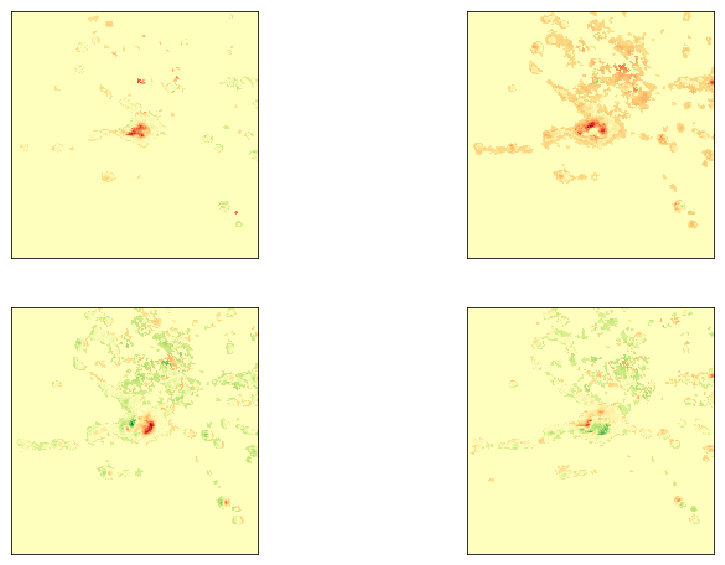

In [11]:
plot_series(haiti_series)

In [13]:
haiti_series_means = haiti_series.mean(axis=(1,2))
haiti_series_means

array([-0.07875 , -0.69085 ,  0.182125,  0.084625,  0.035075])

In [16]:
df_haiti_series = pd.DataFrame({
    'mean_change': haiti_series_means
}, index=range(2009,2014))
df_haiti_series.head()

,mean_change
2009,-0.078750
2010,-0.690850
2011,0.182125
2012,0.084625
2013,0.035075


/Users/jpw/Development/master_thesis/venv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


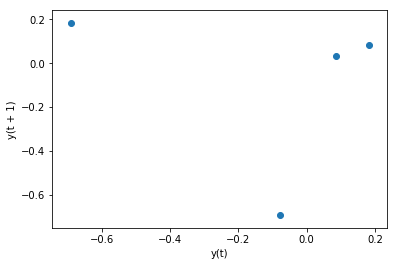

In [24]:
lag_plot(df_haiti_series['mean_change'])
plt.show()